# 3D Wannier calculations

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

In [3]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(
    N,
    R0=R0,
    # lattice=np.array([3, 3], dtype=int),
    lattice=np.array([6], dtype=int),
      lc=(1690, 1520),
    dim=3,
    avg=1 / 2,
    sparse=True,
    symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [6 1 1]
lattice: lattice constants: [1.69 1.52 1.69]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[48 20 20] is set.
DVR: R0=[7.225 3.    7.2  ]w is set.
H_op: n=[48 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 6 states are to be calculated.
H_op: n=[48 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.75s.
H_solver: eigenstates memory usage: 0.99 MiB.
H_op: n=[48 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 6 states are to be calculated.
H_op: n=[48 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver

| 1D x chain | t (kHz) | $\mu$ (kHz) | U (kHz) |
| -- | ----- | ----- | ----- |
| 2 | 0.33459339 | -35.15147705 | 1.16669761 |
| 3 | 0.29154572 | -35.15989359 -36.15465807 | 1.16075052 1.08831435 |
| 4 | 0.29111124 0.24774003 | -35.16008983 -36.16069493 | 1.16018491 1.08606769 |
| 5 | 0.291103027 0.247220317 | -35.1600951  -36.16081958 -36.1667645 | 1.15841229 1.08268238 1.08521976 |
| 6 | 0.291102775 0.247209318 0.246698550 | -35.16009521 -36.16082275 -36.16688994 | 1.15488029 1.07767206 1.0745695 |

| 1D y chain | t (kHz) | $\mu$ (kHz) | U (kHz) |
| -- | ----- | ----- | ----- |
| 2 | 0.09926161 | -34.39925269 | 1.23623438 |
| 3 | 0.09280767 | -34.39959408 -34.83640662 | 1.23609266 1.18905493 |
| 4 | 0.0927989793 0.0864121562 | -34.39959504 -34.83669976 | 1.238437   1.19090978 |
| 5 | 0.0927989561 0.0864030213 | -34.39959504 -34.83670055 -34.83699298 | 1.24381596 1.18095209 1.19415962 |
| 6 | 0.0927989658 0.0864029968 0.0863938848 | -34.39959504 -34.83670055 -34.83699376 | 1.23810398 1.18414654 1.1760808 |


| 2D Plaquett | t (kHz) | $\mu$ (kHz) | U (kHz) |
| -- | ----- | ----- | ----- |
| 2x2 | 0.33364721 0.09660292 | -35.6348516 | 1.11173354 |
| 3x3 | 0.0904338849 0.290634614 0.289613446 0.0879192624 | -35.6435493 -36.08746291 -36.6445585 -37.09460885 | 1.10585854 1.06025591 1.03430202 0.98913985 |

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 2 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 25 20] is set.
DVR: R0=[3.76  3.845 7.2  ]w is set.


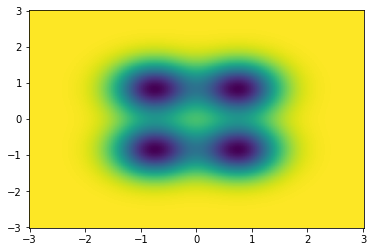

In [23]:
import matplotlib.pyplot as plt
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([2, 2], dtype=int),
              band=1,
              dim=3,
              avg=1 / 2,
              sparse=True,
              symmetry=True)

x = np.linspace(-dvr.R0[0] * 0.8, dvr.R0[0] * 0.8, 500)
X = np.meshgrid(x, x)
V = dvr.Vfun(*X, 0)

plt.pcolormesh(*X, V)

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 2 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 25 20] is set.
DVR: R0=[3.76  3.845 7.2  ]w is set.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 20 20] is set.
DVR: R0=[3.76 3.   7.2 ]w is set.


(-0.64, -0.62)

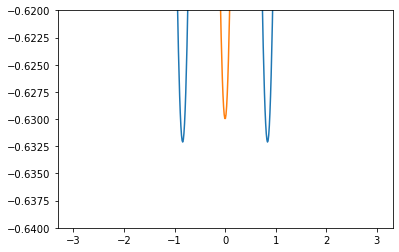

In [22]:
import matplotlib.pyplot as plt
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([2, 2], dtype=int),
              band=1,
              dim=3,
              avg=1 / 2,
              sparse=True,
              symmetry=True)

x = np.linspace(-dvr.R0[0] * 0.8, dvr.R0[0] * 0.8, 500)

V1 = dvr.Vfun(0, x, 0)
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([2], dtype=int),
              band=1,
              dim=3,
              avg=1 / 2,
              sparse=True,
              symmetry=True)
V2 = dvr.Vfun(0, x, 0)

plt.plot(x, V1, x, V2)
plt.ylim([-0.64, -0.62])


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 20 20] is set.
DVR: R0=[3.76 3.   7.2 ]w is set.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [1 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.


(-1.02, -0.99)

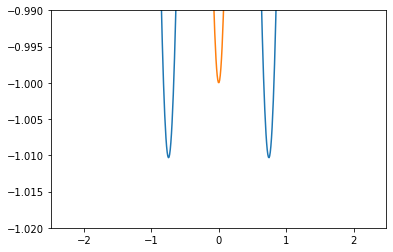

In [24]:
import matplotlib.pyplot as plt
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([2], dtype=int),
              band=1,
              dim=3,
              avg=1 / 2,
              sparse=True,
              symmetry=True)

x = np.linspace(-dvr.R0[0] * 0.6, dvr.R0[0] * 0.6, 500)

V1 = dvr.Vfun(x,0, 0)
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([1], dtype=int),
              band=1,
              dim=3,
              avg=1 / 2,
              sparse=True,
              symmetry=True)
V2 = dvr.Vfun(x, 0, 0)

plt.plot(x, V1, x, V2)
plt.ylim([-1.02, -0.99])

Why x and y direciton don't seem to affect each otehr? It is y direction is further. Since tunneling is very sensitive to spacing, this is quite reasonable. We find the effect of adding 2 wells along y direction is much smaller than adding along x direction. This is also convincing.

## Reproduce 1D 8-site chain lattice

In [13]:
from wannier import *
import numpy as np
from positify import positify
from scipy.stats import gmean

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([8], dtype=int),
              lc=(1600, 1520),
              trap=(42, 930),
              laser=770,
              dim=3,
              avg=1,
              sparse=True,
              symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=42kHz w=930nm
lattice: Full lattice sizes: [8 1 1]
lattice: lattice constants: [1.72043011 1.6344086  1.72043011]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[60 20 20] is set.
DVR: R0=[9.02150538 3.         7.2       ]w is set.
H_op: n=[60 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[60 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.24s.
H_solver: eigenstates memory usage: 1.64 MiB.
H_op: n=[60 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[60 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize spars

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


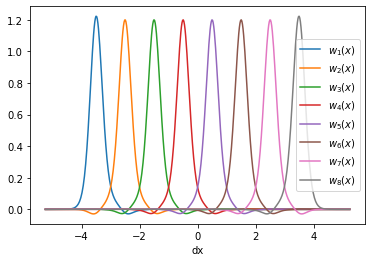

In [14]:
import matplotlib.pyplot as plt

mu = 0
k = dvr.Nsite
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / dvr.lc[0],
         positify(
             wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                          [x, y, z]).reshape(-1, k)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(k)))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

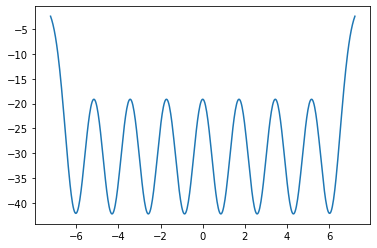

In [18]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)
V = dvr.Vfun(x, 0, 0) * dvr.V0 / dvr.kHz_2p

plt.plot(x, V)

The onsite ineraction is rather close, but the tunneling is much much larger than exp't estimation. As we can see, the traps are pretty close, which results in a giant overlap between Wannier funcitons.

In [51]:
from wannier import *
import numpy as np
from positify import positify
from scipy.stats import gmean

N = 20
R0 = np.array([3, 3, 7.2])
w = np.sqrt(2 / (1 / 930**2 + 1 / 1250**2))
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([8], dtype=int),
              lc=(1350, 1520),
              trap=(50, w),
              laser=770,
              dim=3,
              avg=1,
              sparse=True,
              symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=1055.2060816556739nm
lattice: Full lattice sizes: [8 1 1]
lattice: lattice constants: [1.27937094 1.44047691 1.27937094]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[49 20 20] is set.
DVR: R0=[7.4777983 3.        7.2      ]w is set.
H_op: n=[49 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[49 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.07s.
H_solver: eigenstates memory usage: 1.35 MiB.
H_op: n=[49 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[49 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diago

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


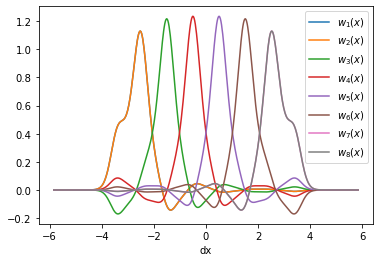

In [52]:
import matplotlib.pyplot as plt

mu = 0
k = dvr.Nsite
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / dvr.lc[0],
         positify(
             wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                          [x, y, z]).reshape(-1, k)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(k)))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

Use w=930nm is somewhat reasonable, as any wider trap will result in too shallow barrier s.t. the Wannier function no longer form a localized basis.

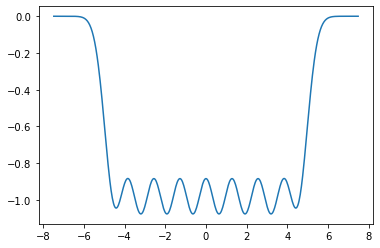

In [53]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)
V = dvr.Vfun(x, 0, 0)

plt.plot(x, V)